## Reformkommissionen Nye Reformveje 1's effects in the solow model with human capital
On april 6th 2022 Reformkommissionen recommended shortening the length of roughly half of the mastser's degrees in Denmark in the report [Nye Reformveje 1](reformkommissionen) . The suggestions from Reformkommisionen's suggestion has sparked a severe debate e.g in [Jyllandsposten](https://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdfhttps://reformkommissionen.dk/media/25523/nye-reformveje-1_web.pdf) and [Politiken](https://politiken.dk/debat/debatindlaeg/art9148200/Er-kortere-uddannelse-virkelig-en-katastrofe). 


One way of interpreting Reformkommisionen's suggestion, is as that the shortened degrees are a reduction in the savings rate of human capital. Thus we believe that the Solow model with human capital is a highly relevant framework to aanlyze the predictions of Reformkomissionen's suggestion. We base our theoretical model and parameter values on chapter 5 from the classic introductory macroeconomics book: <div class="csl-entry">Sørensen, P. B., &#38; Whitta-Jacobsen, H. J. (2010). <i>Introducing Advanced Macroeconomics Growth and Business Cycles</i> (Second edtion). McGraw Hill education.</div>

The `modelproject.py` file includes a model class which will be used multiple times in this notebook.

Imports and set magics:

In [43]:
import numpy as np
from scipy import optimize
import sympy as sm
from matplotlib import pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})


# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import Solow # import the Solow model class
model = Solow()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Description and analytical derivation of the Solow model

### Description

We define the solow model with human capital from the listed equations, following standard notation.

$$
\begin{align}
    Y_t & = K_t^{\alpha} H_t^{\phi} (A_tL_t)^{1-\alpha-\phi}, &0<α,φ<1\\
    S_t & = (s_k + s_H) Y_t, &s_k + s_H < 1 \\
    C_t &= Y_t-S_t = (1-s_K-s_H)Y_t \\
    K_{t+1} &= s_K Y_t + (1-\delta)K_t \\
    H_{t+1} &= s_H Y_T + (1-\delta)H_t \\
    L_{t+1} &= (1+n) L_t \\
    A_{t+1} &= (1+g) L_t.
\end{align}
$$

We define the tilde transformation of $X_t$ as
$$
\begin{aligned}
    \tilde{X}_t & \equiv X_t/(A_tL_t) \\
\end{aligned}
$$

Using this transformation, we can rewrite the transitions equation for fysical capital (4) and human capital (5), as

$$
\begin{aligned}

    \tilde{k}_{t+1} &= \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\phi} + (1-\delta) \tilde{k}_t),\\
    
    \tilde{h}_{t+1} &= \frac{1}{(1+n)(1+g)}(s_H \tilde{h}_t^{\alpha} \tilde{h}_t^{\phi} + (1-\delta) \tilde{h}_t).\\

\end{aligned}
$$

We derive the nullclines using sympy

### Derivation

In [44]:
# a. define symbols 
k_tilde, h_tilde = sm.symbols('ktilde_t, htilde_t')
sK, sH = sm.symbols('s_K, s_H')
g, n  = sm.symbols('g, n')
delta, alpha, phi = sm.symbols('delta, alpha, phi')

# b. define transistion equations
trans_k = sm.Eq(k_tilde, 
                1/((1+n)*(1+g))*(sK*k_tilde**alpha*h_tilde**phi+(1-delta)*k_tilde))
trans_h = sm.Eq(h_tilde, 
                1/((1+n)*(1+g))*(sH*k_tilde**alpha*h_tilde**phi+(1-delta)*h_tilde))

# c. derive nullclines from transition equations, isolate for h tilde 
# i. for no change in k tilde
no_change_k = sm.solve(trans_k,h_tilde)[0] 
null_k = sm.Eq(h_tilde, no_change_k)

# ii. for no change in h tilde
no_change_h = sm.solve(trans_h,h_tilde)[0]
null_h = sm.Eq(h_tilde, no_change_h)

# d. display nullclines 
print('no change in k tilde:')
display(null_k)
print('no change in h tilde:')
display(null_h)


no change in k tilde:


Eq(htilde_t, (ktilde_t**(1 - alpha)*(delta + g*n + g + n)/s_K)**(1/phi))

no change in h tilde:


Eq(htilde_t, ((delta + g*n + g + n)/(ktilde_t**alpha*s_H))**(1/(phi - 1)))

As we can see from the power of $\tilde{k}_t$, the nullcline for $\Delta \tilde{k}_t = 0$ and $\Delta \tilde{h}_t = 0$ is respectively convex and concave in the $\tilde{k}_t$-th dimension. We can explicitly show this by inserting values in our nullclines and test its behaviour for different values of n.

In [45]:
# a. lambdify nullclines 
null_k_func = sm.lambdify([k_tilde, alpha, delta, g, n, phi, sK], no_change_k)
null_h_func = sm.lambdify([k_tilde, alpha, delta, g, n, phi, sH], no_change_h)

# b. generate values 
# i. define independent values in nullcline
k_tilde_vec = np.linspace(1e-10,3,100)

# ii. use standard parameter-values from model
par = model.par 

alpha_val = par.alpha
delta_val = par.delta
g_val = par.g
n_val = par.n
phi_val = par.phi
sK_val = 0.12
sH_val = 0.07

# ii. insert in lamdified nullclines
null_k_val = null_k_func(k_tilde_vec,alpha_val,delta_val,g_val, n_val, phi_val, sK_val)
null_h_val = null_h_func(k_tilde_vec,alpha_val,delta_val,g_val, n_val, phi_val, sH_val)


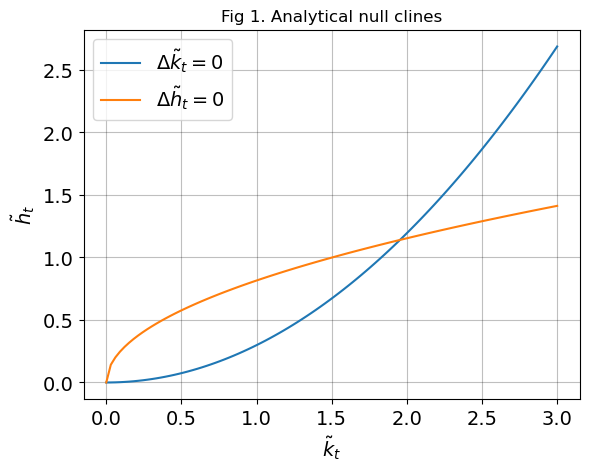

In [46]:
# c. plot nullclines
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_tilde_vec, null_k_val, label = r'$ \Delta \tilde{k}_t = 0$')
ax.plot(k_tilde_vec, null_h_val, label = r'$ \Delta \tilde{h}_t = 0$')
ax.set_xlabel(r'$\tilde{k}_t$',)
ax.set_ylabel(r'$\tilde{h}_t$',)
ax.set_title('Fig 1. Analytical null clines', size=12)

ax.legend(loc='upper left');

The lambdified nullclines look as expected <br>
We check with different values of $n$, as we expect that an increase in population growth rate, would decrease the steady state value of $\tilde{k}$, and $\tilde{h}$.

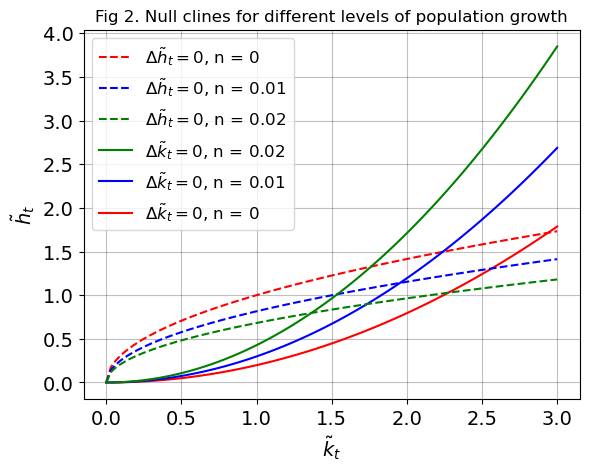

In [47]:
# plot nullclines for different values of n
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# predefine latex-labels 
label_k = r'$ \Delta \tilde{k}_t = 0$'
label_h = r'$ \Delta \tilde{h}_t = 0$'

# plot nullclines over different values of n. Use same values as before. 
n_lst=[0, 0.01, 0.02]
colors = ['red', 'blue', 'green']
for i, n_val in enumerate(n_lst):
    null_k_val = null_k_func(k_tilde_vec, alpha_val, delta_val, g_val, n_val, phi_val, sK_val)
    null_h_val = null_h_func(k_tilde_vec, alpha_val, delta_val, g_val, n_val, phi_val, sH_val)
    ax.plot(k_tilde_vec,null_k_val, label = f'{label_k}, n = {n_val}', color = colors[i])
    ax.plot(k_tilde_vec,null_h_val, label = f'{label_h}, n = {n_val}', color = colors[i], linestyle='--')

ax.set_xlabel(r'$\tilde{k}_t$',)
ax.set_ylabel(r'$\tilde{h}_t$',)
ax.set_title('Fig 2. Null clines for different levels of population growth', size=12)

# customize legend 
# i. specify order 
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,3,5,4,2,0] # 0 is the first label in default legend.

# ii. pass handle & labels lists along with order
ax.legend([handles[i] for i in order], [labels[i] for i in order], fontsize="12");

As we can see from the plot, the steady state values does indeed decrease with an increase in n.

## Simulation and numerical solution

For the baseline simulation results we use the plausable parameters $\phi=\alpha=1/3$, $s_k=0.2$, $s_h=0.15$, $\delta=0.06$, $g=0.02$, $n=0.01$. 

* We solve the model numerically by simulating the model for a given set of parameters until we find the steady state

    * To do this we define initial values for all factor inputs in the production funciton and simulate the savings, deprecaiton and ultimately accumulation of (human) capital period by period

    * We define steady state as when the tilde variables' $\Delta$ is sufficiently small (tolerance defined in modelproject.py)

* We check the robustness of the results using many different initial values

* Based on the simulation we attempt to determine the optimal savings rate through SciPy optimization and find that the optimal savings rates align with theoretical predictions



### Simulation ###

* We simulate the model for 1000 periods for initial values of $L_0=1$, $K_0=2$ and $H_0=3$.

* In figure 3, we then compare the convergence with the analytical results for the given parameter values. The simulation converges to the analytical solutions, as can be seen below

* In figure 4, we combine the lambdified null-clines with the simulation for a range of initial values


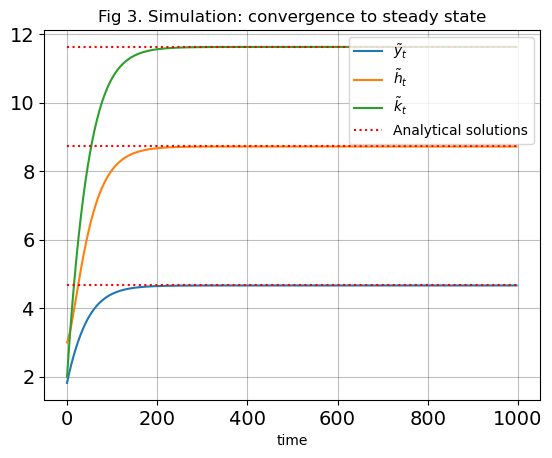

In [48]:
# Initialize simulation
model.par.simT = 1000
model.par.K_init = 2
model.par.H_init = 3

# run simulation and store results
ss = model.find_steady_state()

y_t = ss.y_tilde
h_t = ss.h_tilde
k_t = ss.k_tilde

# compare with analytical solution
anal_sol = model.anal_steady_state()
y_anal = anal_sol.y_tilde 
h_anal = anal_sol.h_tilde 
k_anal = anal_sol.k_tilde 

# plot figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(y_t, label = r'$\tilde{y}_t$')
ax.plot(h_t, label = r'$\tilde{h}_t$')
ax.plot(k_t, label = r'$\tilde{k}_t$')
ax.hlines((y_anal,h_anal,k_anal), 0,1000, linestyles='dotted',colors='red', label='Analytical solutions')
ax.set_xlabel('time',size = 10)
ax.set_title('Fig 3. Simulation: convergence to steady state', size = 12)
ax.legend(loc = 'upper right', fontsize = 10);


In [49]:
model.plot_convergence_interactive();
model = Solow() #re-initialize model


interactive(children=(SelectionSlider(description='H_init', index=3, options=(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

### Optimal savings rates

We solve for the optimal savings rate using a grid search and the scipy module

* Using both a grid search and the scipy.optimize.minimize module we find that the optimal savingsrates in the simulated model adhere to the theoretical results
$$\phi=\alpha=s_k^{opt}=s_h^{opt}=1/3$$

* Despite having an analytical optimum, which indicates the objective function has nice properties, we employ the Nelder-mead gradient-free optimizer to ensure a robust optimization process, which consequently increases the number of iterations. 

* Although saving rates are a condition in our optimization problem, they have not posed any issues thus far. If they were to become problematic, we would consider implementing a penalty function when utilizing the Nelder-mead optimizer.

**Brute-force discretely**

In [50]:
solve = model.find_opt_s(discrete=True) # solve brute-force

print(solve.sK_opt)
print(solve.sH_opt)

0.3265306189795918
0.3265306189795918


**Solve contiuosly with SciPy optimization (Nelder-Mead)**

In [51]:
solve = model.find_opt_s(discrete=False) # solve using Nelder-Mead with penalty as constraint

print(solve.sK_opt)
print(solve.sH_opt)

0.3333333558138229
0.3333332845296211


**Nelder-Mead solution is closer to the theoretical prediction. Difference in result can be minimized by increasing the number of possibilities in solutions for the brute force solution, while greatly decreasing the speed**

In [52]:
solve = model.find_opt_s(discrete=True, discrete_sqrt_iter=80) # baseline = 50.

print(solve.sK_opt)
print(solve.sH_opt)

0.32911393075949363
0.32911393075949363


### Simulation of a change $s_h$ compared to steady state values for $s_h = 0.15$ 

Figure 5 is an interactive plot showing the long-term effects on steady state values following a shock to human capital savings.

In [55]:
model.par.simT = 1000 # to secure that we reach steady state in simulation

model.plotbaseline_vs_new_sh_intactive()
model = Solow() #re-initialize model
# go germany!

interactive(children=(SelectionSlider(description='new_sH', index=12, options=(0.0, 0.01, 0.02, 0.03, 0.04, 0.…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Conclusion

We find that the theoretical predictions and simulations results align, and that our model converges for all testede initial values of $K$ and $H$. We further find that the optimal saving rates for physical and human capital are equal to the relative marginal productivity of $\alpha$ and $\phi$ respectively. We also find that decresing the savings rate of human capital has negative effects on production no matter how much it is decreased. All our results are based on dubious assumptions and ought to be tested by structural estimation of the relevant parameters. However, if one believes in the framework of the Solow model with human capital, one can conclude that only in the case that  Denmark is saving more than the emperical $\phi$ in human capital, it would make sense to decrease the savings rate of human capital.